LINEAR REGRESSION

In [162]:
import pandas as pd                                   #manipulate data
import matplotlib.pyplot as plt                       #plotting the data
import numpy as np                                    #calculate statistics based stuff           
from sklearn.preprocessing import StandardScaler      #scaling the data
from sklearn.model_selection import train_test_split  #splitting training and testing(20%)
from sklearn.linear_model import LinearRegression     #training our linear regression model
from sklearn.metrics import mean_squared_error, r2_score #evalution metrics mainly

In [190]:
data = r"C:\Users\bianc\Downloads\Housing.csv"
df = pd.read_csv(data)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [173]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

# If any categorical columns exist, encode them
# Example: df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})


In [191]:
# Drop categorical if any, or encode as shown above
X = df[['area', 'bedrooms', 'bathrooms']]  # input features
y = df['price']  # target variable

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [193]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 
#inverse_transform to undo stuff

In [194]:
from sklearn.model_selection import cross_val_score
linear_regression = LinearRegression()
model = linear_regression.fit(X_train_scaled,y_train)


Cross validation


Cross-validation is a technique to evaluate the performance of a machine learning 
model by splitting your data into multiple parts (called folds) 
and testing the model's performance on different subsets.

In [195]:
mse = cross_val_score(linear_regression, X_train_scaled,y_train,scoring= "neg_mean_squared_error",cv=3)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [196]:
print(-np.mean(mse))

1649643773325.779


In [197]:
predictions = linear_regression.predict(X_test_scaled)

In [198]:
predictions

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527606, 3561265.8244721 ,
       3487335.97847432, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793137, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199842, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932196,
       5021117.35611339, 7122556.7133197 , 3238600.04801448,
       5366583.9261965 , 3640253.68688196, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154445, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716684,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693418,

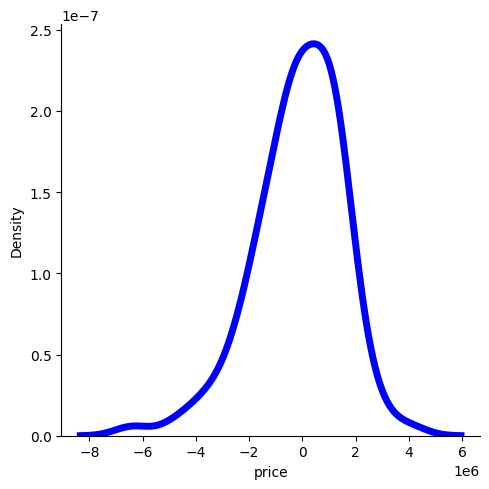

In [199]:
import seaborn as sns
sns.displot(predictions-y_test,color = "blue",kind = 'kde',linewidth = 5)

In [200]:
print("Mse: " ,mean_squared_error(predictions,y_test))
print("r2 score: ",r2_score(y_test,predictions))

Mse:  2750040479309.0527
r2 score:  0.4559299118872444


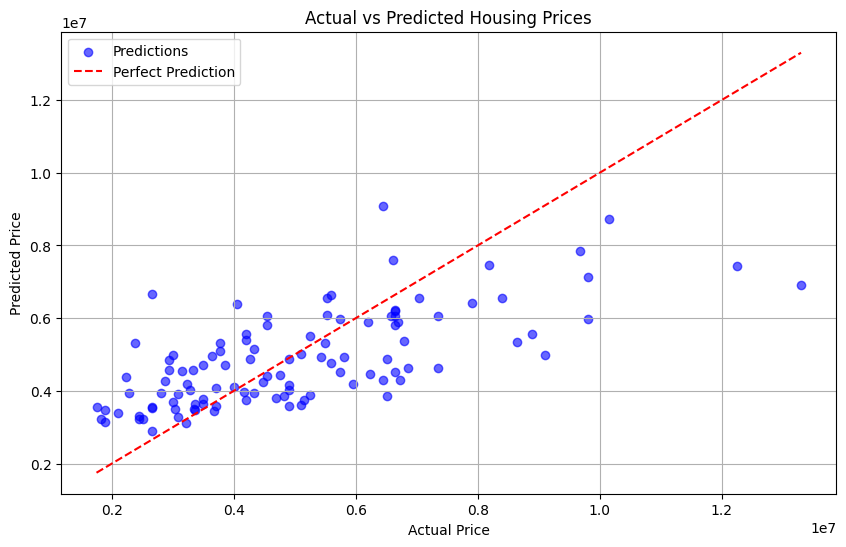

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Correct plot: Actual test price vs predicted price
plt.scatter(y_test, predictions, color='blue', alpha=0.6, label="Predictions")

# Add a diagonal reference line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.show()
